# Tran Quoc Long - 14520490

## Clustering with face datasets

## Step in brief of LBP extraction

	1. Devide examied window into cells (16x16)
	2. For each pixel in a cell, compare to 8 neighbor, Follow along a circle
	3. Assign "number" "0" for pixel whose value is greater than the center, and "1" for the others
	4. Compute the histogram of frequency of each "number" occuring -> 16*16 = 256-demensional feature vector
	5. Optionaly normalize the histogram
	6. Concatenate (normalized) histogram of all cells -> Feature vector  for entire window

### Content

Thực hiện các phép cluster trên bộ dữ liệu face lfw_people
Nội dung bao gồm trong file:
1. Chạy thử các hàm cluster và các hàm liên quan
    - Kmeans
    - Spectral clustering
    - DBSCAN
    - Agglomerative clustering
    - Cross table
    - Figure to visualize result
    - Show centroid of Kmeans
    - Biểu diễn LBP dưới sơ đồ histogram
2. Nội dung thực hành 3

In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# load data set
lfw_people = fetch_lfw_people()

In [3]:
lfw_people.images.shape

(13233, 62, 47)

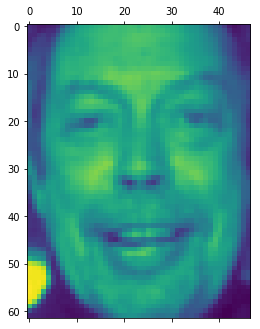

In [4]:
%matplotlib inline
plt.matshow(lfw_people.images[0])

In [5]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

### Test functions on 1 image

In [6]:
from skimage.feature import local_binary_pattern 

In [7]:
# settings for LBP
radius = 4
n_points = 8 
METHOD = 'uniform'

image = lfw_people.images[0]

#LBP 
lbp_features = local_binary_pattern(image, n_points, radius)

In [8]:
print(lbp_features)
print('ccccc')
lbp_features.shape

[[ 192.  192.  193. ...,  112.  112.   32.]
 [ 192.  193.  193. ...,  112.  112.   48.]
 [ 193.  193.  193. ...,  112.  112.   48.]
 ..., 
 [   4.    4.    4. ...,   28.    8.   12.]
 [   6.    4.   12. ...,    8.    0.    0.]
 [   6.    4.   12. ...,    8.    0.    0.]]
ccccc


(62, 47)

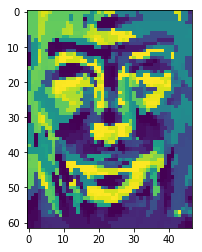

In [36]:
plt.imshow(lbp_features)

In [37]:
import numpy as np
data = np.histogram(lbp_features, bins = range(0,257))
print('data:\n', data)

data:
 (array([180,  42,  15,  32,  41,   5,  15,  35,  23,   1,   4,   4,  47,
         3,  34,  56,  50,   6,   0,   1,   3,   1,   1,   2,  39,   4,
         1,   1,  59,   5,  64,  44,  31,   3,   4,   6,   1,   0,   0,
         4,   2,   1,   1,   1,   6,   0,   2,   3,  44,   1,   7,   2,
         3,   0,   3,   5,  90,   1,   2,   6,  90,   7,  25,  29,  49,
        14,   5,   9,   9,   1,   5,   2,   5,   1,   2,   0,   4,   0,
         2,   9,   1,   0,   0,   0,   1,   0,   1,   1,   9,   2,   1,
         0,  14,   1,   3,   0,  25,   1,   0,   5,   4,   1,   2,   2,
         9,   2,   1,   1,   2,   0,   0,   6,  81,   4,   0,   3,   1,
         1,   3,   0, 133,   5,   1,   1,  74,   3,  23,  14,  25,  48,
         2,  41,   2,   6,   3,  63,   3,   0,   3,   0,   4,   1,   3,
        25,   0,   7,   0,   0,   0,   0,   0,   5,   3,   3,   1,   2,
         4,   3,   0,  11,   1,   1,   0,   6,   0,   1,   0,  10,   1,
         0,   0,   1,   0,   0,   0,   1,   2,   0,   0,

<Container object of 256 artists>

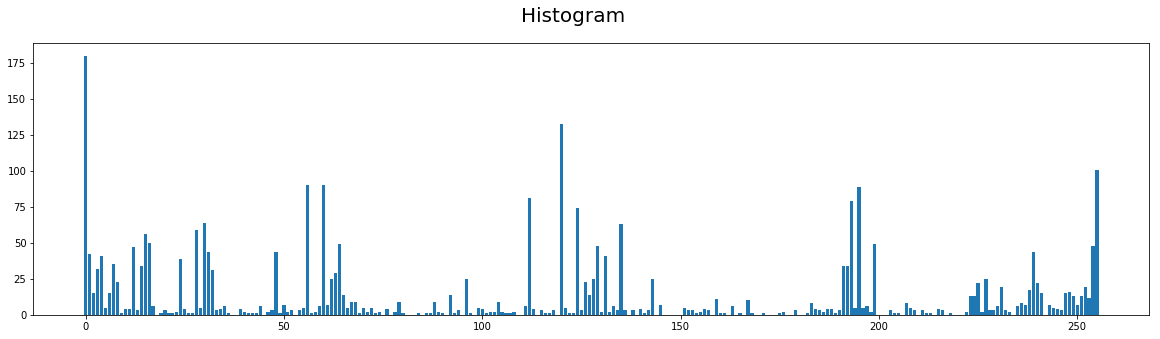

In [41]:
fig2 = plt.figure(figsize = [20,5])
fig2.suptitle('Histogram', fontsize = 20)
plt.bar(range(len(data[0])),data[0], align='center')

# Process for all images in dataset

## Extract LBP features of Images

In [42]:
def get_LBP_feature(mLBP_of_Image):
    return np.histogram(mLBP_of_Image, bins = range(0,257))

In [43]:
#compute local binary pattern
def pre_Compute(image):
    n_points = 8
    radius = 4
    return local_binary_pattern(image, n_points, radius)

In [44]:
#Process all images and store to list
list_Features = []
for image in lfw_people.images:
    lbp_value = pre_Compute(image)
    feature_vector = get_LBP_feature(lbp_value)
    list_Features.append(feature_vector[0])
    


In [46]:
print(len(list_Features)) # to check if list cantained enough element

13233


In [47]:
print(list_Features[0])

[180  42  15  32  41   5  15  35  23   1   4   4  47   3  34  56  50   6
   0   1   3   1   1   2  39   4   1   1  59   5  64  44  31   3   4   6
   1   0   0   4   2   1   1   1   6   0   2   3  44   1   7   2   3   0
   3   5  90   1   2   6  90   7  25  29  49  14   5   9   9   1   5   2
   5   1   2   0   4   0   2   9   1   0   0   0   1   0   1   1   9   2
   1   0  14   1   3   0  25   1   0   5   4   1   2   2   9   2   1   1
   2   0   0   6  81   4   0   3   1   1   3   0 133   5   1   1  74   3
  23  14  25  48   2  41   2   6   3  63   3   0   3   0   4   1   3  25
   0   7   0   0   0   0   0   5   3   3   1   2   4   3   0  11   1   1
   0   6   0   1   0  10   1   0   0   1   0   0   0   1   2   0   0   3
   0   0   1   8   4   3   2   4   4   1   3  34  34  79   5  89   5   6
   2  49   0   0   0   3   1   1   0   8   5   3   0   3   1   1   0   4
   3   0   1   0   0   0   2  13  13  22   2  25   3   3   6  19   3   2
   0   6   8   7  17  44  22  15   0   7   5   4   

In [48]:
from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image
from sklearn.metrics.pairwise import cosine_similarity

## Using KMEANS to cluster

In [49]:
from sklearn.cluster import KMeans
import time

In [50]:
start = time.time()
nClusters = 5749
kmeans_model = KMeans(nClusters)
face_labels = kmeans_model.fit_predict(list_Features)
end = time.time()

In [25]:
print(len(face_labels))
clustering_time = end - start
print('Time: ', clustering_time, '(s)')

13233
Time:  989.8880825042725 (s)


### Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

In [28]:
from sklearn.decomposition import PCA

nComponents = 3  # 3-dim
vPCA = PCA(nComponents)
digitData_to_3D = vPCA.fit_transform(lfw_people.data)


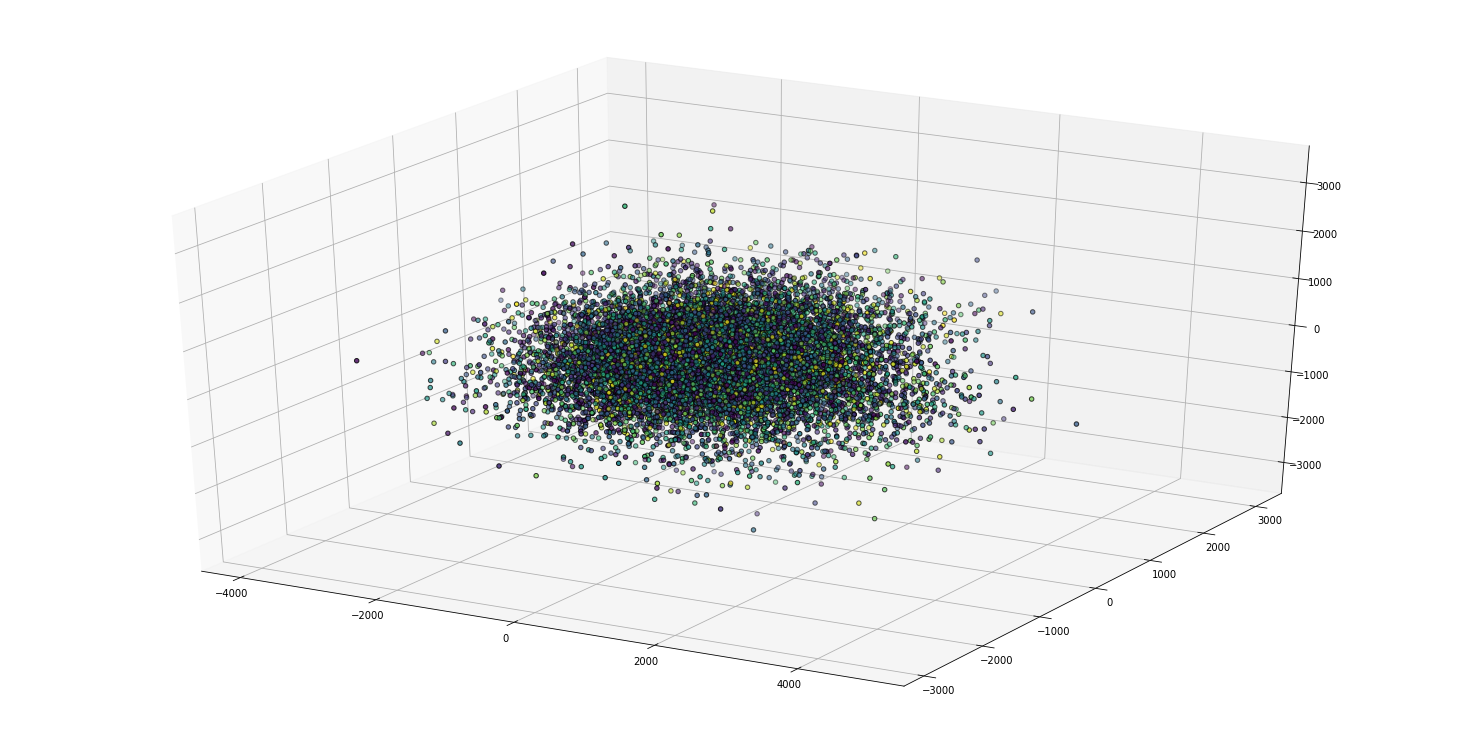

In [54]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20,10))
#plt.scatter(digitData_to_3D[:,0], digitData_to_3D[:,1], digitData_to_3D[:,2], c= face_labels, s=10, depthshade=True)
ax = Axes3D(fig)
ax.scatter(digitData_to_3D[:,0], digitData_to_3D[:,1], digitData_to_3D[:,2],
               c=face_labels, edgecolor='k', s = 20)
#set_title('Visulization Result - K-measns')

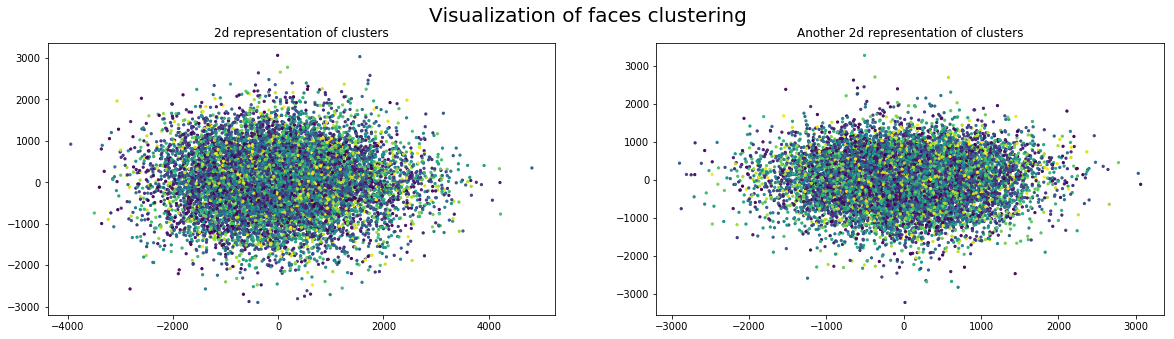

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20,5))
fig.suptitle('Visualization of faces clustering', fontsize=20)

ax = fig.add_subplot(1,2,1)
plt.scatter(digitData_to_3D[:,0], digitData_to_3D[:,1], c= face_labels, s=5)
plt.title('2d representation of clusters')

ax = fig.add_subplot(1,2,2)
plt.scatter(digitData_to_3D[:,1], digitData_to_3D[:,2], c= face_labels, s=5)
plt.title('Another 2d representation of clusters')

In [62]:
print(lfw_people.target)
print(len(lfw_people.target))

[5360 3434 3807 ..., 2175  373 2941]
13233


## Face clustering on 4 methods

In [1]:
#import libs
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg


In [2]:
#import scikit-learn
from sklearn import metrics
from sklearn.cluster import KMeans, spectral_clustering, DBSCAN, AgglomerativeClustering
from sklearn.datasets import load_digits
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler

In [3]:
# load data set
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
'''
It took lots of time on full dataset, but there're a bunch of clusters just contain 1 face (test above).
So I just select face with min_face = 70
'''

"\nIt took lots of time on full dataset, but there're a bunch of clusters just contain 1 face (test above).\nSo I just select face with min_face = 70\n"

In [4]:
lfw_people.images.shape

(1288, 50, 37)

In [5]:
print(np.unique(lfw_people.target)) #number of faces/clusters expected

[0 1 2 3 4 5 6]


## Extract LBP features of Images from loaded dataset

In [6]:
from skimage.feature import local_binary_pattern

In [7]:
def get_LBP_feature(mLBP_of_Image):
    return np.histogram(mLBP_of_Image, bins = range(0,257))
#compute local binary pattern
def pre_Compute(image):
    n_points = 8
    radius = 4
    return local_binary_pattern(image, n_points, radius)

#Process all images and store to list
data = []
for image in lfw_people.images:
    lbp_value = pre_Compute(image)
    feature_vector = get_LBP_feature(lbp_value)
    data.append(feature_vector[0])
    


In [8]:
print(data[0])

[ 89   6  33  20  36   7  34  26  10   0   0   0  17   0  33  13  57  10
   1   4   4   0   1   1  44   1   2   1 119   0  85  16  20   1   2   0
   8   1   3   1   0   0   0   0   1   0   4   1  78   0   1   0   9   0
   0   0  61   0   2   1  84   3  31  14  19   1   2   6   6   2   3   4
   1   1   1   0   2   1   3   2   3   0   0   0   0   0   0   1   2   2
   0   1   1   0   3   2  14   1   1   0   1   0   1   0   1   0   0   0
   2   1   0   1  30   1   0   0   1   0   0   0  45   1   6   1  81   1
  15   5  13  11   4  14   4   5   1  39   0   1   0   1   1   0   4  12
   2   3   0   0   0   0   1   4   5   1   0   0   0   0   2  13   2   2
   0   0   0   0   1   1   1   0   0   1   1   0   2   6   0   1   0   1
   0   0   0   1   1   2   0   0   2   3   0   8  13  10   1  18   3   2
   0  33   0   0   1  10   4   4   7   9   2   9   0   0   0   0   0   3
   3   1   0   3   0   0   0  17   9   5   3  10   3   3   0  10   0   0
   1   4   0   1   3  35   8  17   1   8   0   0   

In [9]:
#Kmeans
nClusters = 7
t0 = time()
kmeans_model = KMeans(nClusters)
labels_kmeans = kmeans_model.fit_predict(data)
t_kmeans = time()- t0
#Cross table
print('Kmeans:\n')
df1 = pd.DataFrame({'labels':labels_kmeans,'Truth labels':lfw_people.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

Kmeans:

Truth labels   0   1   2    3   4   5   6
labels                                   
0              4  14  25   82  17  12  20
1              4  20  10   73  10   6  14
2             16  32  27   62  20  17  31
3             14  55   7   51  12   7  16
4              9   5  10  129   3  11  18
5             29  52  28   89  18   5  24
6              1  58  14   44  29  13  21


In [10]:
#Spectral_clustering
t0 = time()
graph = cosine_similarity(data)
labels_spectral = spectral_clustering(graph, n_clusters=7)
t_spectral = time()- t0
#Spectral clustering - Crosstable
print('Spectral clustering:\n')
df1 = pd.DataFrame({'labels':labels_spectral,'Truth labels':lfw_people.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)


Spectral clustering:

Truth labels   0   1   2    3   4   5   6
labels                                   
0              3  57  13   45  20   8  29
1              2   7  11   44  31  22   8
2             14  55  15   56   9   7  23
3             13  18  20   93   6  11  11
4              8  29  14   72  23   8  22
5             24  59  35   84  15  12  29
6             13  11  13  136   5   3  22


In [11]:
#DBSCAN
t0 = time()
data1 = StandardScaler().fit_transform(data)
labels_dbscan = DBSCAN(eps=1, min_samples=1, algorithm ='brute').fit_predict(data)
t_dbscan = time()- t0
#DBSCAN - cross table
print('DBSCAN:\n')
df1 = pd.DataFrame({'labels':labels_dbscan,'Truth labels':lfw_people.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

DBSCAN:

Truth labels  0  1  2  3  4  5  6
labels                           
0             0  0  0  0  0  1  0
1             0  0  0  0  0  0  1
2             0  0  0  1  0  0  0
3             0  1  0  0  0  0  0
4             1  0  0  0  0  0  0
5             0  1  0  0  0  0  0
6             0  0  0  1  0  0  0
7             0  0  0  0  1  0  0
8             0  0  0  1  0  0  0
9             1  0  0  0  0  0  0
10            0  0  0  1  0  0  0
11            0  0  1  0  0  0  0
12            0  0  0  1  0  0  0
13            0  1  0  0  0  0  0
14            0  0  0  0  1  0  0
15            0  0  0  1  0  0  0
16            0  0  0  1  0  0  0
17            0  0  0  1  0  0  0
18            0  0  0  1  0  0  0
19            0  0  0  1  0  0  0
20            0  0  0  1  0  0  0
21            0  0  0  1  0  0  0
22            0  0  0  0  0  1  0
23            0  0  0  1  0  0  0
24            0  0  0  0  0  0  1
25            0  0  0  0  0  1  0
26            0  0  0  0  0  0  1
27   

In [12]:
#Agglomerative Clustering 
t0 = time()
Agglomerative_model = AgglomerativeClustering(n_clusters = nClusters)
labels_AgglomerativeClustering = Agglomerative_model.fit_predict(data)
t_agg = time() - t0
#Agglomerative Clustering - crosstable
print('Agglomerative Clustering:\n')
df1 = pd.DataFrame({'labels':labels_AgglomerativeClustering,'Truth labels':lfw_people.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

Agglomerative Clustering:

Truth labels   0   1   2    3   4   5   6
labels                                   
0              9  46   6   42   4  15   6
1             18  23  17  150   8  11  26
2              3  25  24   86  13   9  16
3              3  23   5   59   5   6  15
4              5  24  26   78  27  13  26
5              0  42  14   42  23  12  14
6             39  53  29   73  29   5  41


### Comparison

In [13]:

n_faces = len(np.unique(lfw_people.target))
#print frame
print(82 * '_')
print('init\t\ttime\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


data = data
sample_size = 100
#define a function to measure and print out
def bench_clustering(method_name, time_, labels):
    print('%-9s\t%.2fs\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (method_name, time_,
             metrics.homogeneity_score(lfw_people.target, labels),
             metrics.completeness_score(lfw_people.target, labels),
             metrics.v_measure_score(lfw_people.target, labels),
             metrics.adjusted_rand_score(lfw_people.target, labels),
             metrics.adjusted_mutual_info_score(lfw_people.target,  labels),
             metrics.silhouette_score(data, labels,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    

#Kmeans
bench_clustering('K-means', t_kmeans, labels_kmeans)
#Spectral_clustering
bench_clustering('spectral', t_spectral, labels_spectral)
#Agglomerative clustering
bench_clustering('Agg.', t_agg, labels_AgglomerativeClustering)
#DBSCAN ==> Problems with raw data
#bench_clustering('DBSCAN', t_dbscan, labels_dbscan)
print('-----------\nProblems with raw data cause noise with DBSCAN method')

__________________________________________________________________________________
init		time	homo	compl	v-meas	ARI	AMI	silhouette
K-means  	0.39s	0.057	0.050	0.053	0.027	0.043	0.079
spectral 	0.28s	0.060	0.053	0.056	0.032	0.046	0.027
Agg.     	0.21s	0.053	0.047	0.050	0.024	0.040	0.055
-----------
Problems with raw data cause noise with DBSCAN method


### Nhận xét:
1. Từ bảng kết quả trên, ta thấy phương pháp spectral clustering cho kết quả có độ chính xác cao nhất trong các phương pháp, với tốc độ nhanh hơn K-means.
2. Agglomerative clustering: tốc độ chạy nhanh nhất nhưng kết quả có độ chính xác thấp nhất
3. Kmeans: tốc độ chậm nhất với kết quả có độ chính xác ở tầm trung của các phương pháp

### Visualization

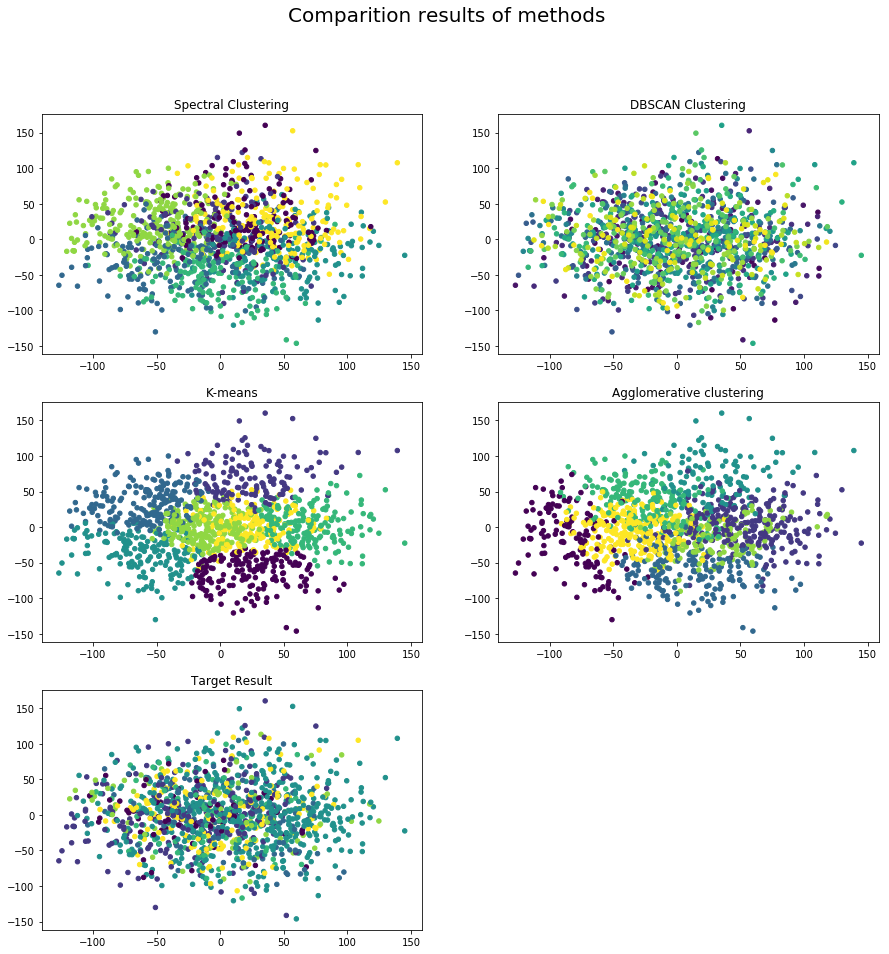

In [14]:
from sklearn.decomposition import PCA
%matplotlib inline
nComponents = 2
vPCA = PCA(nComponents)
digitData_to_2D = vPCA.fit_transform(data)

fig = plt.figure(figsize=(15,15))
fig.suptitle('Comparition results of methods', fontsize=20)

ax = fig.add_subplot(3,2,1)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_spectral, s=20)
ax.set_title('Spectral Clustering')

ax = fig.add_subplot(3,2,2)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_dbscan, s=20)
ax.set_title('DBSCAN Clustering')

ax = fig.add_subplot(3,2,3)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_kmeans, s=20)
ax.set_title('K-means')

ax = fig.add_subplot(3,2,4)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_AgglomerativeClustering, s=20)
ax.set_title('Agglomerative clustering')

ax = fig.add_subplot(3,2,5)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= lfw_people.target, s=20)
ax.set_title('Target Result')
